#### Imports

In [2]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
import sklearn.model_selection as split
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
print('Color palette for plots')
sns.set_palette('magma')
sns.color_palette('magma')

Color palette for plots


[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [4]:
attrib = ['edibility', 'capSh', 'capSu', 'capCo', 'bru', 'od', 'gillAt', 'gillSp', 'gillSi', 'gillCo', 'stalkSh', 'stalkRo', 'stalkSurA', 'stalkSurB', 'stalkColA', 'stalkColB', 'veil', 'veilCo', 'ringNu', 'ring', 'sporeCo', 'pop', 'hab']
print(f'Total attributes: {len(attrib)}')

df = pd.read_csv(
    'agaricus-lepiota.csv',
    header=None)
df.columns = attrib
print(f'Total entries: {df.shape[0]}')

df.head(5)

Total attributes: 23
Total entries: 8124


,edibility,capSh,capSu,capCo,bru,od,gillAt,gillSp,gillSi,gillCo,...,stalkSurB,stalkColA,stalkColB,veil,veilCo,ringNu,ring,sporeCo,pop,hab
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


0. Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

In [5]:
df.describe()

,edibility,capSh,capSu,capCo,bru,od,gillAt,gillSp,gillSi,gillCo,...,stalkSurB,stalkColA,stalkColB,veil,veilCo,ringNu,ring,sporeCo,pop,hab
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From describe we see the 23 categorical variables we have in detail, each has multiple classes with the highest being 12 for 'gillCo' which stands for Color of the gills and the lowest being 'Veil' at 1 which stands for the type of Veil

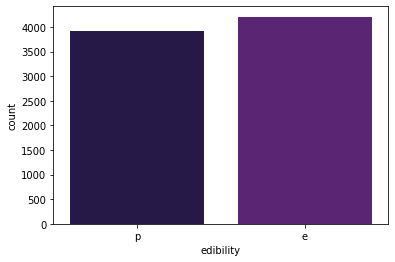

In [6]:
sns.countplot(x='edibility', data=df);

The distribution of edible and inedible mushrooms is almost same, which good for training the model as there would be no bias

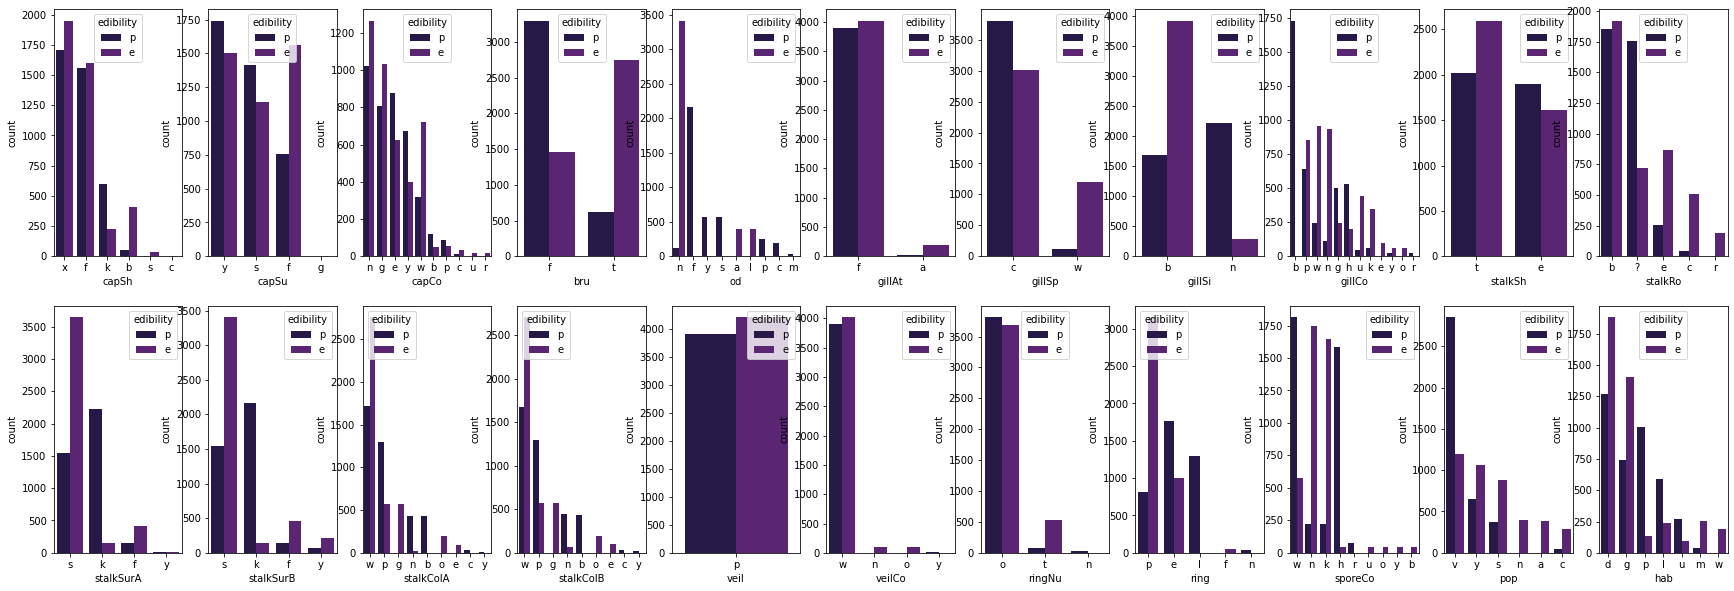

In [30]:
mpl.rcParams.update({'figure.max_open_warning': 0})
plotNum = 0
row = 0
figure, axes = plt.subplots(2, int(len(df.columns)/2), figsize=(30,10))
for i, col in enumerate(df.columns[1:]): 
    sns.countplot(ax=axes[row, plotNum], x=col, order = df[col].value_counts().index, hue='edibility', data = df)
    plotNum+=1
    if plotNum==int(len(df.columns)/2):
        plotNum=0
        row+=1

Here we see the different factors and how they correlate to the edibility of mushrooms, visually we can interpret that 'Od', standing for Odour to be the strongest deterministic factor with least shared edibility status, followed by colors of the Gills, Stalk and Spores

In [8]:
'''
encodedDF = pd.DataFrame()
for col in df.columns:
    encoded = keras.layers.CategoryEncoding(
        num_tokens=len(df[col].unique()),
        output_mode='multi_hot'
        )
    encodedDF[col] = encoded
''';

In [9]:
# Encoding the data and labels into integers to enable training
data = prep.OrdinalEncoder().fit_transform(df.values[:, 1:])
label = prep.LabelEncoder().fit_transform(df.values[:,0])

In [10]:
# Print a random encoded row data along its corresponding label
n = np.random.randint(len(df))
print(f'Shape: {len(data[n])}')
print(f'Data: {data[n]}')
print(f'Label: {label[n]}')

Shape: 22
Data: [5. 3. 3. 0. 2. 1. 0. 0. 3. 0. 1. 1. 1. 4. 0. 0. 2. 1. 2. 1. 4. 4.]
Label: 1


In [11]:
# Splitting the data into train and test segments, with 70% towards training
trainData, testData, trainLabel, testLabel = split.train_test_split(data, label, train_size=0.9, random_state=1)

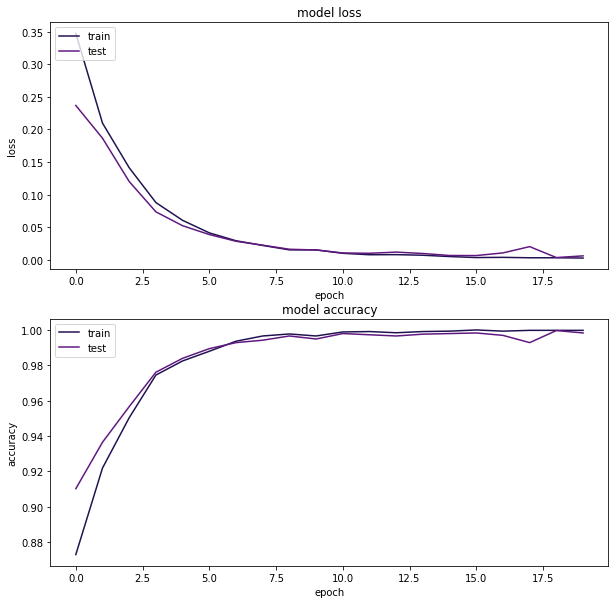

In [32]:
model = keras.Sequential()

model.add(keras.layers.Dense(22, activation='relu'))
model.add(keras.layers.Dense(22, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) # Output layer with one node and Sigmoid

# compile the keras model
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy',
    ])

# fit the keras model on the dataset
history = model.fit(trainData, trainLabel, validation_split=0.4, epochs=20, batch_size=16, verbose=0)
#print(history.history.keys())


figure, ax = plt.subplots(2, 1, figsize=(10,10))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axes(ax[0])
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axes(ax[1])
plt.show()

In [33]:
# evaluate the keras model
_, accuracy = model.evaluate(testData, testLabel, verbose=0)
print(f'Accuracy: {round(accuracy*100, 2)}%')

Accuracy: 99.88%
